# Random Forest Predictions

In this proyect we analys data from LendingClub.com, this enterprice connects people who need money (borrowers) with people who have money (investors). As an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

Data Description:
* credit.policy: (Binary) 1 = the customer meets the credit underwriting criteria, and 0 = otherwise.
* purpose: (Category) The purpose of the loan.
* int.rate: (Float) The interest rate of the loan, to be more risky LoanClub asign a most higth interest rates.
* installment: (Float) The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: (Float) The natural log of the self-reported annual income of the borrower.
* dti: (Float) The debt-to-income ratio of the borrower.
* fico: (Integer) The FICO credit score of the borrower (help to investor to deside about borrowers).
* days.with.cr.line: (Float) The number of days the borrower has had a credit line.
* revol.bal: (Integer) The borrower's revolving balance (at the end of the credit card billing cycle).
* revol.util: (Float) Fraction of line of loan use (in percentage)
* inq.last.6mths: (Integer) Number of inquiries by creditors to borrower in the last 6 months.
* delinq.2yrs: (Integer) The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: (Binary) The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).
* not.fully.paid : (Binary) 0 If borrower paid the credit and 1 if borrower has not paid the loan.

# Import Libraries

**Import the usual libraries for pandas and plotting. You can import sklearn later on.**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Get Data.

In [2]:
df = pd.read_csv('data/loan_data.csv') 

Show data in general.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [5]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


# Exploratory Data Analysis

Text(0.5, 0, 'FICO')

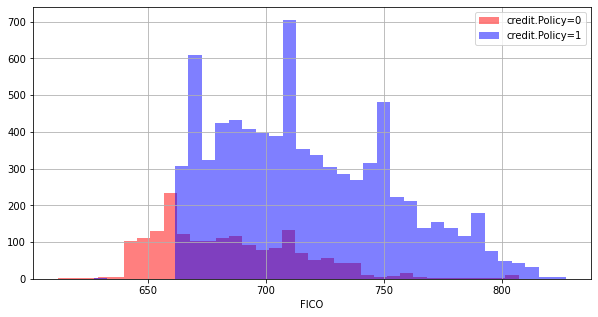

In [12]:
# Relation between credit.policy vs fico indicator.
plt.figure(figsize=(10,5))
df[df['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',bins=35,label='credit.Policy=0')
df[df['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',bins=35,label='credit.Policy=1')
plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

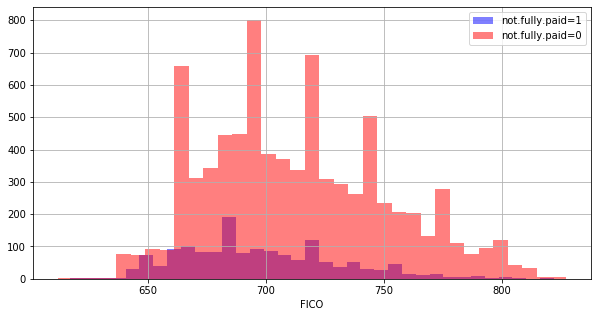

In [21]:
# Relation between fico indicator vs output variable.
plt.figure(figsize=(10,5))
df[df['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',bins=35,label='not.fully.paid=1')
df[df['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',bins=35,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'Inqueries last 6 months')

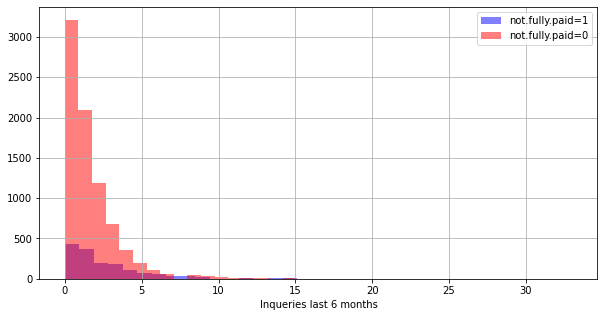

In [7]:
# Relation between inq.last.6mths vs output variable.
plt.figure(figsize=(10,5))
df[df['not.fully.paid']==1]['inq.last.6mths'].hist(alpha=0.5,color='blue',bins=35,label='not.fully.paid=1')
df[df['not.fully.paid']==0]['inq.last.6mths'].hist(alpha=0.5,color='red',bins=35,label='not.fully.paid=0')
plt.legend()
plt.xlabel('Inquiries last 6 months')

Text(0.5, 0, 'The borrowers revolving balance')

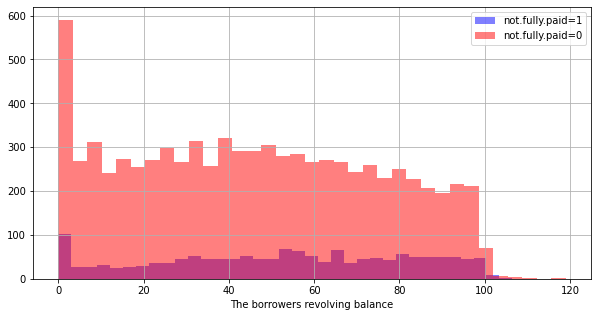

In [8]:
# Relation between revol.util vs output variable.
plt.figure(figsize=(10,5))
df[df['not.fully.paid']==1]['revol.util'].hist(alpha=0.5,color='blue',bins=35,label='not.fully.paid=1')
df[df['not.fully.paid']==0]['revol.util'].hist(alpha=0.5,color='red',bins=35,label='not.fully.paid=0')
plt.legend()
plt.xlabel('The borrowers revolving balance')

<AxesSubplot:xlabel='purpose', ylabel='count'>

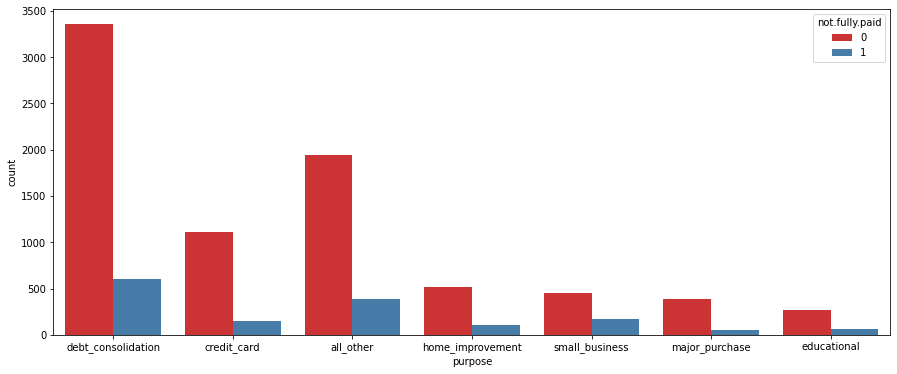

In [9]:
# Create a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid
plt.figure(figsize=(15,6))
sns.countplot(x='purpose',hue='not.fully.paid',data=df,palette='Set1')

<Figure size 1080x432 with 0 Axes>

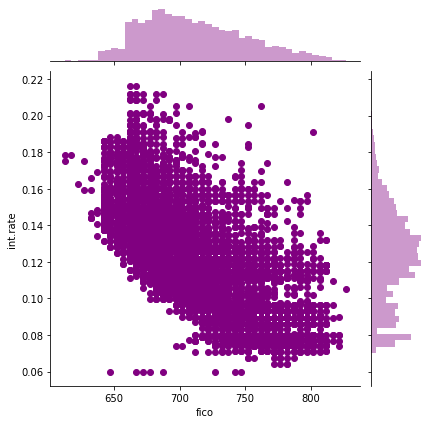

In [10]:
# Show trend between interest rate and FICO rate.
plt.figure(figsize=(15,6))
sns.jointplot(x='fico',y='int.rate',data=df,color='purple')

<Figure size 792x504 with 0 Axes>

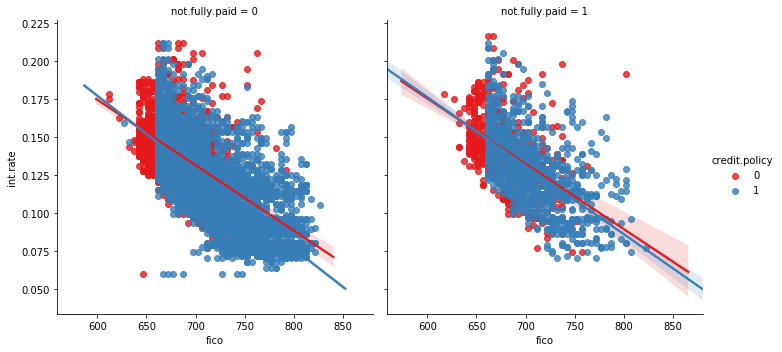

In [29]:
# Create a lmplot to see trend between int.rate and fico rate, when output variable is True and false and the client have credit policy or not.
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=df,hue='credit.policy',col='not.fully.paid',palette='Set1')

### Setting up the Data to Model. ###


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


### Categorical Features. ###

In [13]:
# For work with categorical features, first we need create a list with all categorical variables and later use pd.get_dummies to 
# sklearn can work with this data.
cat_df = ['purpose']
final_df = pd.get_dummies(df,columns=cat_df,drop_first=True)

In [14]:
final_df.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


### Train Test Split

In [15]:
# Now will split our data into a training set and a testing set using train_test_split from sklearn.
from sklearn.model_selection import train_test_split
X = final_df.drop('not.fully.paid',axis=1)
y = final_df['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Training a Decision Tree Model


In [16]:
# Import and create an instance of Desicion Tree Clasifier, later will fit it to the training data.
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

### Predictions and Evaluation of Decision Tree

              precision    recall  f1-score   support

           0       0.85      0.82      0.83      2431
           1       0.18      0.22      0.20       443

    accuracy                           0.72      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.75      0.72      0.74      2874



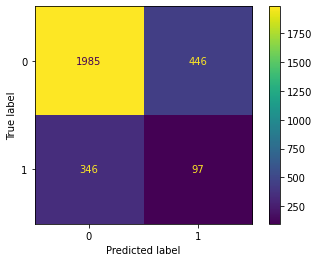

In [19]:
# Create predictions from the test set and create a confusion matrix and classification report to evaluate presicion.
# For visualization we use sklearn.
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import plot_confusion_matrix
pred = dtree.predict(X_test)
matrix = plot_confusion_matrix(dtree, X_test, y_test)
print(classification_report(y_test,pred)) 

### Training the Random Forest model

In [18]:
# Import and create an instance of Random Forest Classifier, later will fit it to the training data.
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=300)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=300)

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.50      0.02      0.03       443

    accuracy                           0.85      2874
   macro avg       0.67      0.51      0.48      2874
weighted avg       0.79      0.85      0.78      2874



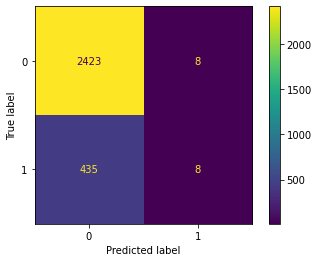

In [20]:
# Create predictions from the test set and create a confusion matrix and classification report to evaluate presicion.
# For visualization we use sklearn.
pred = rfc.predict(X_test)
matrix = plot_confusion_matrix(rfc, X_test, y_test)
print(classification_report(y_test,pred)) 

**Is better the Decision Tree or Random Forest?**

--> More feature engineering is needed for improve results.